## Importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Loading stock price data

In [7]:
data = pd.read_csv('TSLA.csv') 

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Preparing the data

In [9]:
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

## Spliting data into training and testing sets

In [10]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

## Function to create LSTM dataset

In [11]:
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i + time_steps, 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

## time steps for the LSTM

In [12]:
time_steps = 60 

## Creating dataset

In [13]:
X_train, y_train = create_lstm_dataset(train_data, time_steps)
X_test, y_test = create_lstm_dataset(test_data, time_steps)

## Reshaping the data for input

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Build the LSTM model

In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

## Compile

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Train

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
59/59 [==============================] - 6s 41ms/step - loss: 0.0049
Epoch 2/10
59/59 [==============================] - 2s 38ms/step - loss: 2.8676e-04
Epoch 3/10
59/59 [==============================] - 2s 37ms/step - loss: 2.5432e-04
Epoch 4/10
59/59 [==============================] - 2s 40ms/step - loss: 2.4544e-04
Epoch 5/10
59/59 [==============================] - 2s 41ms/step - loss: 2.3938e-04
Epoch 6/10
59/59 [==============================] - 2s 39ms/step - loss: 2.1810e-04
Epoch 7/10
59/59 [==============================] - 2s 39ms/step - loss: 2.0140e-04
Epoch 8/10
59/59 [==============================] - 2s 39ms/step - loss: 1.8710e-04
Epoch 9/10
59/59 [==============================] - 2s 39ms/step - loss: 1.8322e-04
Epoch 10/10
59/59 [==============================] - 2s 39ms/step - loss: 1.8353e-04


## Making Predictions

In [18]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

14/14 [==============================] - 0s 12ms/step


In [19]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

## Ploting actual and predicted price

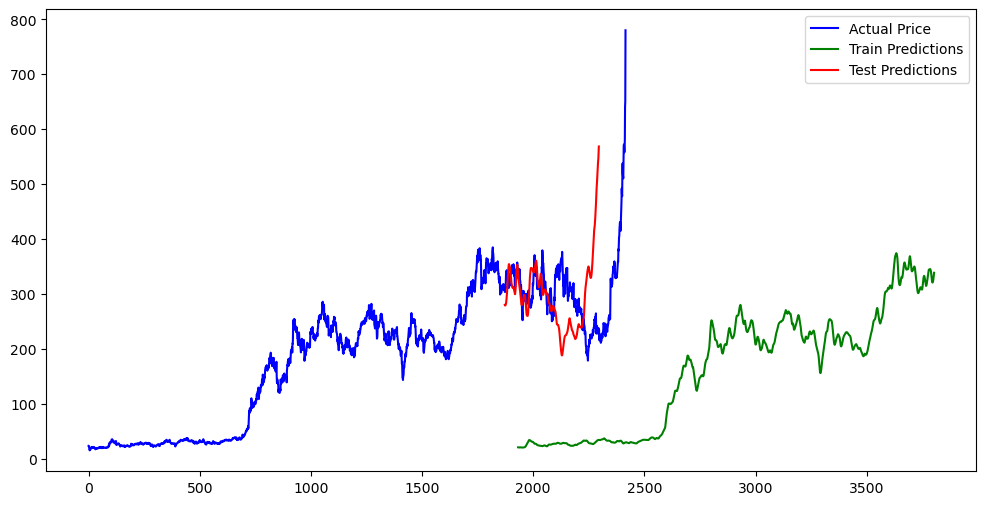

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices, color='blue', label='Actual Price')
plt.plot([None]*train_size + [x[0] for x in train_predictions], color='green', label='Train Predictions')
plt.plot([None]*len(train_predictions) + [x[0] for x in test_predictions], color='red', label='Test Predictions')
plt.legend()
plt.show()